### Introduction
This data set contains information about 5,000 movies collected from The Movie Database (TMDb) via kaggle.https://www.kaggle.com/tmdb/tmdb-movie-metadata 

### The questions about this dataset:

1. Does higher budget mean higher popularity ? What is the kind of relationship ?

2. Will the runtime affect the vote count and popularity?

3. Does Higher popularity means higher profits ?

4. What Features are associated with Top 10 Revenue Movies ?

5. Which genres are most popular from year to year?

In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import ast
%matplotlib inline

In [36]:
# Read the file into a dataframe using pd.read_csv() method of pandas
df1 = pd.read_csv('tmdb_5000_movies_cleaned.csv')
# Display first five rows of the dataset using .head() method
df1.head()

,budget,genres,original_language,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,title,vote_average,vote_count
0,237000000.0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",en,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",12/10/2009,2.787965e+09,162.0,Avatar,7.2,11800
1,300000000.0,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",en,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",5/19/2007,9.610000e+08,169.0,Pirates of the Caribbean: At World's End,6.9,4500
2,245000000.0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",en,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",10/26/2015,8.806746e+08,148.0,Spectre,6.3,4466
3,250000000.0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",en,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",7/16/2012,1.084939e+09,165.0,The Dark Knight Rises,7.6,9106
4,260000000.0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",en,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",3/7/2012,2.841391e+08,132.0,John Carter,6.1,2124


In [37]:
# .shape attribute gives no of rows and no of columns as a tuple
df1.shape

(4803, 13)

In [38]:
# view all the columns in the dataframe.
df1.columns

Index(['budget', 'genres', 'original_language', 'overview', 'popularity',
       'production_companies', 'production_countries', 'release_date',
       'revenue', 'runtime', 'title', 'vote_average', 'vote_count'],
      dtype='object')

In [39]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                3766 non-null   float64
 1   genres                4803 non-null   object 
 2   original_language     4803 non-null   object 
 3   overview              4800 non-null   object 
 4   popularity            4803 non-null   float64
 5   production_companies  4803 non-null   object 
 6   production_countries  4803 non-null   object 
 7   release_date          4802 non-null   object 
 8   revenue               3376 non-null   float64
 9   runtime               4801 non-null   float64
 10  title                 4803 non-null   object 
 11  vote_average          4803 non-null   float64
 12  vote_count            4803 non-null   int64  
dtypes: float64(5), int64(1), object(7)
memory usage: 487.9+ KB


In [40]:
df1.isnull().sum()

budget                  1037
genres                     0
original_language          0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                 1427
runtime                    2
title                      0
vote_average               0
vote_count                 0
dtype: int64

In [41]:
df1['budget'] = df1['budget']/1000000
df1['revenue'] = df1['revenue']/1000000

#### Seperate the Numerical and Categorical Features

In [42]:
df_num = df1.select_dtypes(exclude = 'object')
df_num.head()

,budget,popularity,revenue,runtime,vote_average,vote_count
0,237.0,150.437577,2787.965087,162.0,7.2,11800
1,300.0,139.082615,961.000000,169.0,6.9,4500
2,245.0,107.376788,880.674609,148.0,6.3,4466
3,250.0,112.312950,1084.939099,165.0,7.6,9106
4,260.0,43.926995,284.139100,132.0,6.1,2124


In [43]:
df_num.describe()

,budget,popularity,revenue,runtime,vote_average,vote_count
count,3766.000000,4803.000000,3376.000000,4801.000000,4803.000000,4803.000000
mean,37.042838,21.492301,117.031353,106.875859,6.092172,690.217989
std,42.646514,31.816650,183.483090,22.611935,1.194612,1234.585891
min,0.000001,0.000000,0.000005,0.000000,0.000000,0.000000
25%,8.000000,4.668070,15.352895,94.000000,5.600000,54.000000
50%,23.000000,12.921594,51.751835,103.000000,6.200000,235.000000
75%,50.000000,28.313505,140.165096,118.000000,6.800000,737.000000
max,380.000000,875.581305,2787.965087,338.000000,10.000000,13752.000000


The minimum budget is showing zero which indicates the presence of outliers

In [44]:
df1.budget.mean()

37.042837631704735

In [45]:
df1.runtime.mean()

106.87585919600083

In [46]:
df1[df1['budget'] == 0].shape

(0, 13)

In [47]:
df1[df1['revenue'] == 0].shape

(0, 13)

In [48]:
df1[df1['popularity'] == 0].shape

(1, 13)

In [49]:
df1[df1['vote_average'] == 0].shape

(63, 13)

### Univariate Numeric Columns Analysis

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Probability Density')

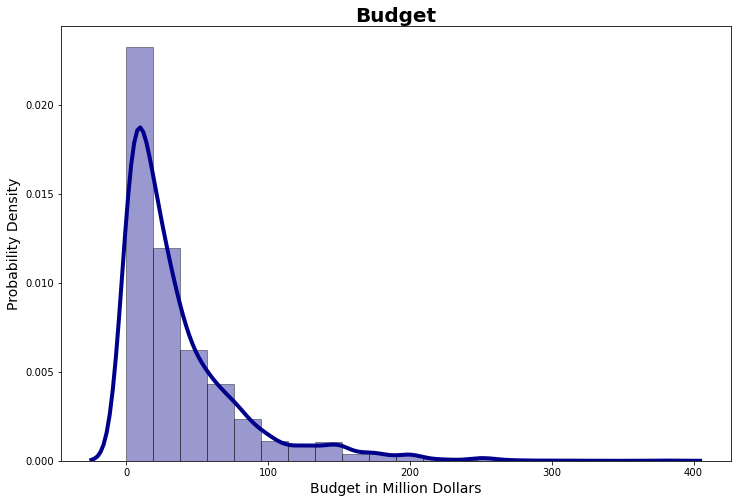

In [50]:
fig, ax = plt.subplots(figsize = (12,8))
sns.distplot(x=df1['budget'], hist=True, kde=True, 
             color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4}, 
             bins = 20)
plt.title('Budget', fontsize= 20, pad= -70, weight ='bold')
plt.xlabel('Budget in Million Dollars', fontsize = 14)
plt.ylabel('Probability Density', fontsize = 14)

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Probability Density')

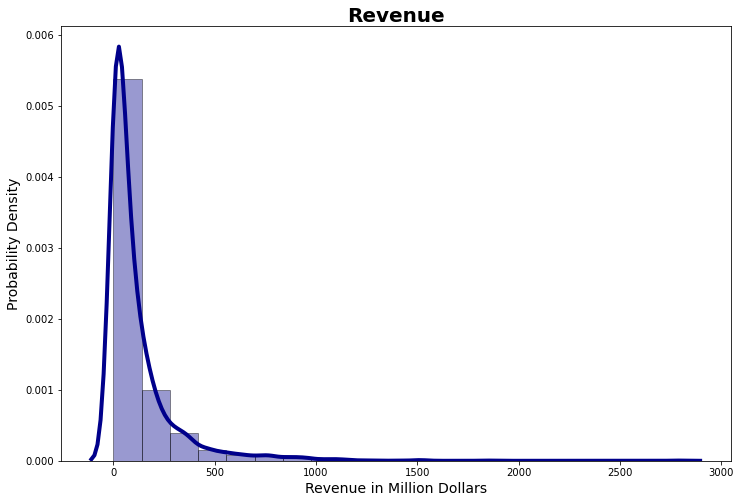

In [51]:
fig, ax = plt.subplots(figsize = (12,8))
sns.distplot(x=df1['revenue'], hist=True, kde=True, 
             color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4}, 
             bins = 20)
plt.title('Revenue', fontsize= 20, pad= -70, weight ='bold')
plt.xlabel('Revenue in Million Dollars', fontsize = 14)
plt.ylabel('Probability Density', fontsize = 14)

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Probability Density')

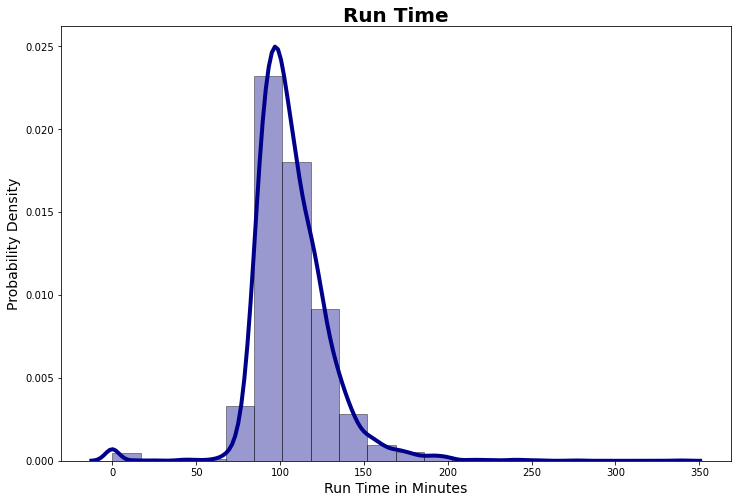

In [52]:
fig, ax = plt.subplots(figsize = (12,8))
sns.distplot(x=df1['runtime'],  hist=True, kde=True, 
             color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4}, 
             bins = 20)
plt.title('Run Time', fontsize= 20, pad= -70, weight ='bold')
plt.xlabel('Run Time in Minutes', fontsize = 14)
plt.ylabel('Probability Density', fontsize = 14)

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Probability Density')

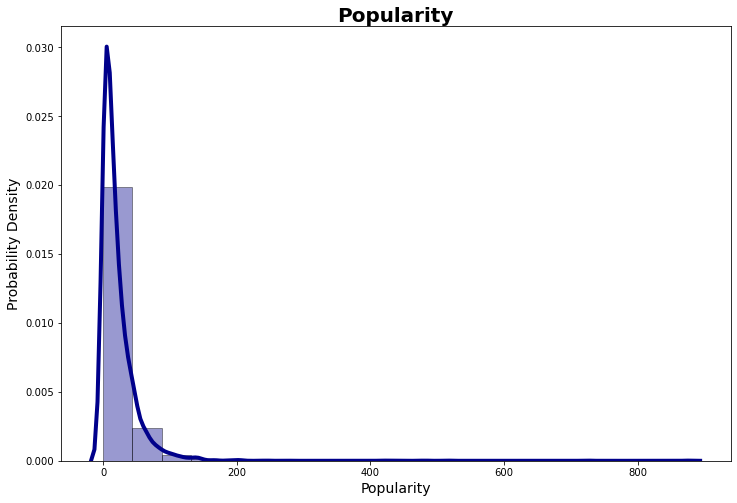

In [53]:
fig, ax = plt.subplots(figsize = (12,8))
sns.distplot(x=df1['popularity'],  hist=True, kde=True, 
             color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4}, 
             bins = 20)
plt.title('Popularity', fontsize= 20, pad= -70, weight ='bold')
plt.xlabel('Popularity', fontsize = 14)
plt.ylabel('Probability Density', fontsize = 14)

Text(0.5, 1.0, 'Vote Average')

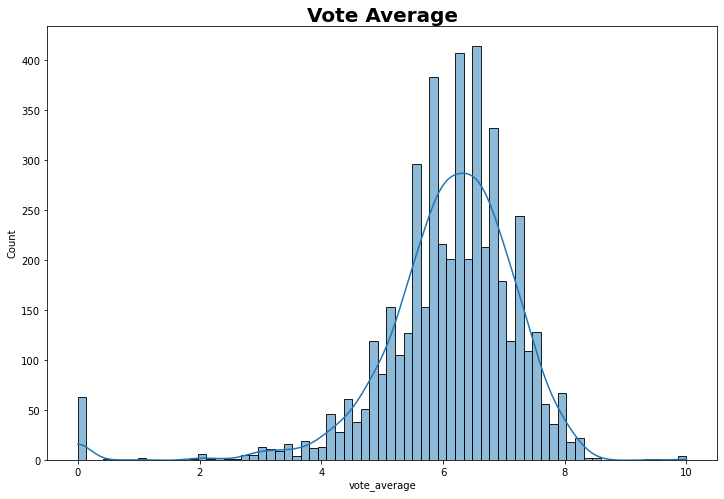

In [54]:
fig, ax = plt.subplots(figsize = (12,8))
sns.histplot(x=df1['vote_average'], kde=True, ax = ax)
plt.title('Vote Average', fontsize= 20, pad= -70, weight ='bold')

Text(0.5, 1.0, 'Vote Count')

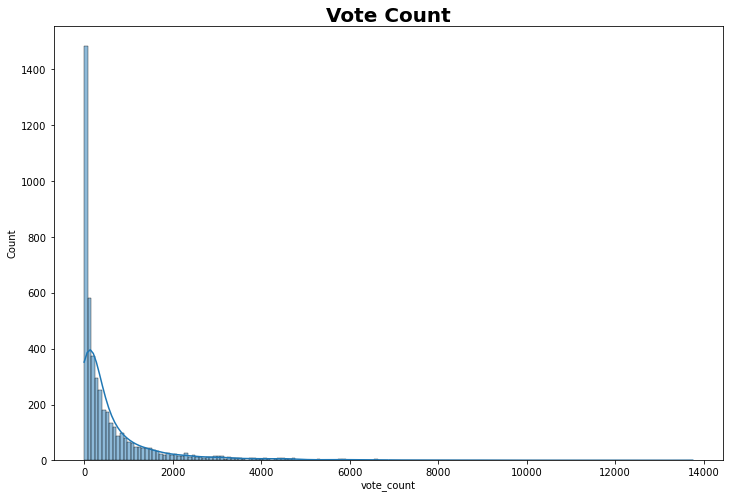

In [55]:
fig, ax = plt.subplots(figsize = (12,8))
sns.histplot(x=df1['vote_count'], kde=True, ax = ax)
plt.title('Vote Count', fontsize= 20, pad= -70, weight ='bold')

### Checking for Outliers

<AxesSubplot:>

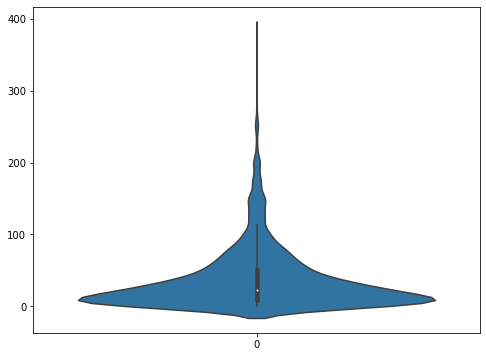

In [56]:
fig,ax = plt.subplots(figsize = (8,6))
sns.violinplot(data = df1['budget'], ax = ax)

<AxesSubplot:>

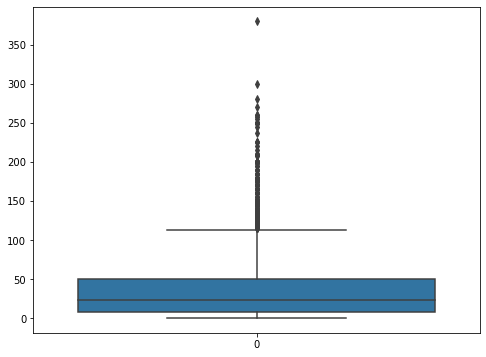

In [57]:
fig,ax = plt.subplots(figsize = (8,6))
sns.boxplot(data = df1['budget'], ax = ax)

<AxesSubplot:>

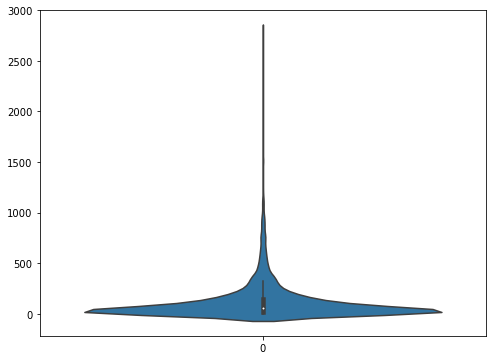

In [58]:
fig,ax = plt.subplots(figsize = (8,6))
sns.violinplot(data = df1['revenue'], ax = ax)

### Handling Categorical Columns

In [59]:
df1.select_dtypes(include = 'object').head()

,genres,original_language,overview,production_companies,production_countries,release_date,title
0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",en,"In the 22nd century, a paraplegic Marine is di...","[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",12/10/2009,Avatar
1,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",en,"Captain Barbossa, long believed to be dead, ha...","[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",5/19/2007,Pirates of the Caribbean: At World's End
2,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",en,A cryptic message from Bond’s past sends him o...,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",10/26/2015,Spectre
3,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",en,Following the death of District Attorney Harve...,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",7/16/2012,The Dark Knight Rises
4,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",en,"John Carter is a war-weary, former military ca...","[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",3/7/2012,John Carter


### Feature Engineering 

- Columns such as genres, keywords, production companies contain multiple values in JSON format (which looks like a list of dictionaries but it is actually a string type. To extract useful values out of them we will apply techniques to extract relevant features.
- These special columns are:

 <b>1. genres</b>: Its in JSON format or a list of dictionaries in python. It has two key fields, 'id' and 'name' where id refers to each type of genre such as comedy, action , romance etc. We need to extract only the genre name out of it. Many films fall under multiple genres hence we will get more than one name in these cases.

 <b>2. production_companies:</b> This column contains information in an JSON format and contains a 'id' and 'name' key for companies which have produced the film. In some cases there are multiple companies which seem to have produced a single movie.
I was not too sure about this so i looked up it up and found that it this indeed true. For example the movie **Avatar** has been produced by 20th Century Fox, Lightstorm Entertainment, Dune Entertainment and Ingenious Film Partners.

 <b>3. production_countries</b>: It is also in JSON format. The 'ISO id' key is the abbreviation of the country. The 'name' country contains the name of the countries where the film scenes were produced.

 <b>4. release_date</b>: This column is a date-time object and needs to be converted using the datetime function.
 <br>

- We will also create a new column called <b>total_votes</b> which is a product of vote_average and vote_count. We have to do this because the number of people who voted for different movies is different hence by only analysing one column we wont get a complete picture.


In [60]:
def get_feature(x):
    feature = []
    x = ast.literal_eval(x)
    for i in x:
        feature.append(i['name'])
    return feature

In [61]:
df1['genres'] = df1['genres'].apply(get_feature)

In [62]:
df1['production_companies'] = df1['production_companies'].apply(get_feature)

In [63]:
df1['production_countries'] = df1['production_countries'].apply(get_feature)

In [64]:
df1['total_votes'] = df1['vote_average']*df1['vote_count']

In [65]:
df1.head()

,budget,genres,original_language,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,title,vote_average,vote_count,total_votes
0,237.0,"[Action, Adventure, Fantasy, Science Fiction]",en,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[Ingenious Film Partners, Twentieth Century Fo...","[United States of America, United Kingdom]",12/10/2009,2787.965087,162.0,Avatar,7.2,11800,84960.0
1,300.0,"[Adventure, Fantasy, Action]",en,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[Walt Disney Pictures, Jerry Bruckheimer Films...",[United States of America],5/19/2007,961.000000,169.0,Pirates of the Caribbean: At World's End,6.9,4500,31050.0
2,245.0,"[Action, Adventure, Crime]",en,A cryptic message from Bond’s past sends him o...,107.376788,"[Columbia Pictures, Danjaq, B24]","[United Kingdom, United States of America]",10/26/2015,880.674609,148.0,Spectre,6.3,4466,28135.8
3,250.0,"[Action, Crime, Drama, Thriller]",en,Following the death of District Attorney Harve...,112.312950,"[Legendary Pictures, Warner Bros., DC Entertai...",[United States of America],7/16/2012,1084.939099,165.0,The Dark Knight Rises,7.6,9106,69205.6
4,260.0,"[Action, Adventure, Science Fiction]",en,"John Carter is a war-weary, former military ca...",43.926995,[Walt Disney Pictures],[United States of America],3/7/2012,284.139100,132.0,John Carter,6.1,2124,12956.4


In [67]:
df1['genres'][0]

['Action', 'Adventure', 'Fantasy', 'Science Fiction']

## Multivariate Analysis

### Correlation Plot

<AxesSubplot:>

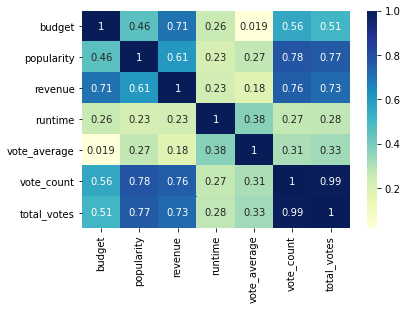

In [68]:
# plot a heatmap to check the correlation between the variables
sns.heatmap(df1.corr(), cmap = 'YlGnBu', annot = True)

### Run Time V/s Popularity

<AxesSubplot:xlabel='runtime', ylabel='popularity'>

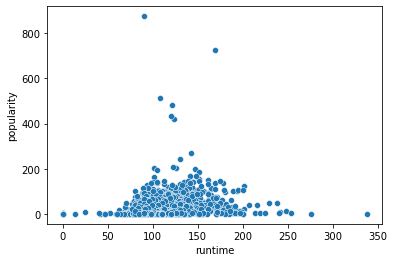

In [69]:
sns.scatterplot(x = df1['runtime'], y = df1['popularity'])

### Budget V/s Revenue

<AxesSubplot:xlabel='budget', ylabel='revenue'>

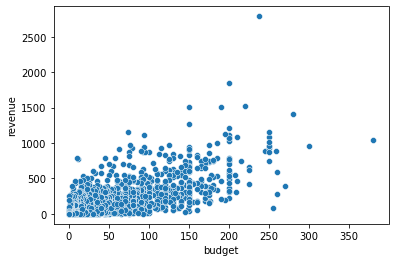

In [70]:
sns.scatterplot(x = df1['budget'], y = df1['revenue'])

### Top 10 Highest Grossing Films

In [71]:
table1 = df1.loc[:, ['title','budget', 'revenue']]
table1['Profit'] = table1['revenue'] - table1['budget']
table1.sort_values(by = 'Profit' , ascending = False, inplace = True)

<ipython-input-72-f2ba68524961>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(table1['title'].iloc[0:10], rotation = 90, fontsize = 14)


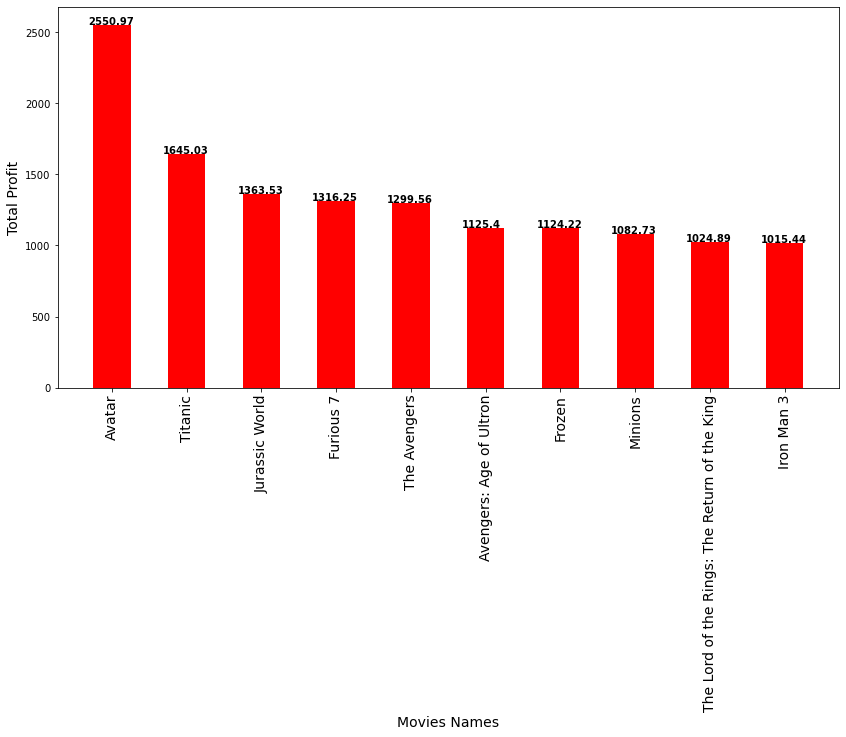

In [72]:
fig, ax = plt.subplots(figsize = (14,7))
ax.bar(table1['title'].iloc[0:10], table1['Profit'].iloc[0:10], width = 0.5, color = 'red')
ax.set_xticklabels(table1['title'].iloc[0:10], rotation = 90, fontsize = 14)
ax.set_xlabel('Movies Names', fontsize = 14)
ax.set_ylabel('Total Profit', fontsize = 14)

profit_val = table1.Profit.values.tolist()
profit_val_10 = profit_val[:10]

for i, j in enumerate(profit_val_10):
    ax.text(i-0.320, j, round(j, 2), color='k',fontweight='bold')

### Top 10 Most Popular Movies

In [73]:
table2 = df1.loc[:, ['title', 'popularity']]
table2.sort_values(by = 'popularity' , ascending = False, inplace = True)

<ipython-input-74-6935b8776b51>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(table2['title'].iloc[0:10], rotation = 90, fontsize = 14)


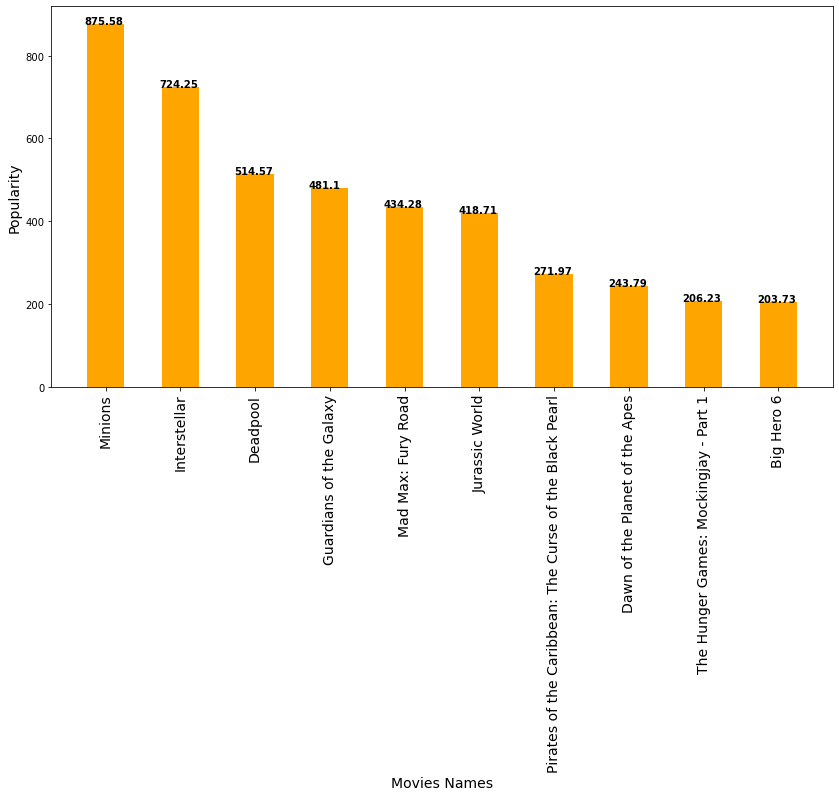

In [74]:
fig, ax = plt.subplots(figsize = (14,7))
ax.bar(table2['title'].iloc[0:10], table2['popularity'].iloc[0:10], width = 0.50, color = 'orange')
ax.set_xticklabels(table2['title'].iloc[0:10], rotation = 90, fontsize = 14)
ax.set_xlabel('Movies Names', fontsize = 14)
ax.set_ylabel('Popularity', fontsize = 14)

pp_val = table2.popularity.values.tolist()
pp_val_10 = pp_val[:10]

for i, j in enumerate(pp_val_10):
    ax.text(i-0.28, j, round(j, 2), color='k',fontweight='bold')

### Top 10 Longest Movies by Runtime

In [75]:
table3 = df1.loc[:, ['title', 'runtime']]
table3.sort_values(by = 'runtime' , ascending = False, inplace = True)
#table3

<ipython-input-76-c09a14a54b87>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(table3['title'].iloc[0:10], rotation = 90, fontsize = 14)


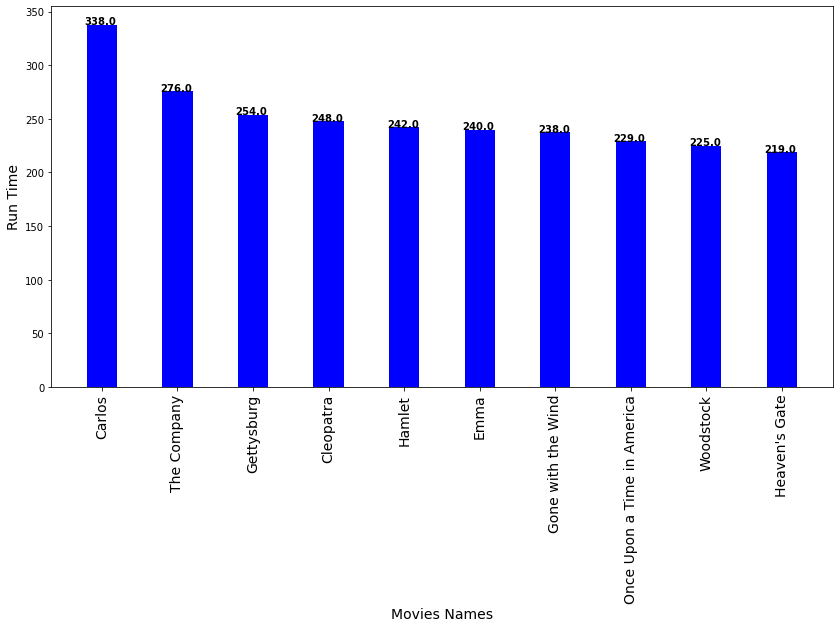

In [76]:
fig, ax = plt.subplots(figsize = (14,7))
ax.bar(table3['title'].iloc[0:10], table3['runtime'].iloc[0:10], width = 0.4, color = 'blue')
ax.set_xticklabels(table3['title'].iloc[0:10], rotation = 90, fontsize = 14)
ax.set_xlabel('Movies Names', fontsize = 14)
ax.set_ylabel('Run Time', fontsize = 14)

rt = table3.runtime.values.tolist()
rt_10 = rt[:10]

for i, j in enumerate(rt_10):
    ax.text(i-0.23, j, round(j, 2), color='k',fontweight='bold')

### Top 10 Movies by Total Votes

In [77]:
table4 = df1.loc[:, ['title', 'vote_average', 'vote_count']]
table4['total_vote'] = table4['vote_average']*table4['vote_count']
table4.sort_values(by = 'total_vote' , ascending = False, inplace = True)
#table4

<ipython-input-78-91269c4bbe6e>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(table4['title'].iloc[0:10], rotation = 90, fontsize = 14)


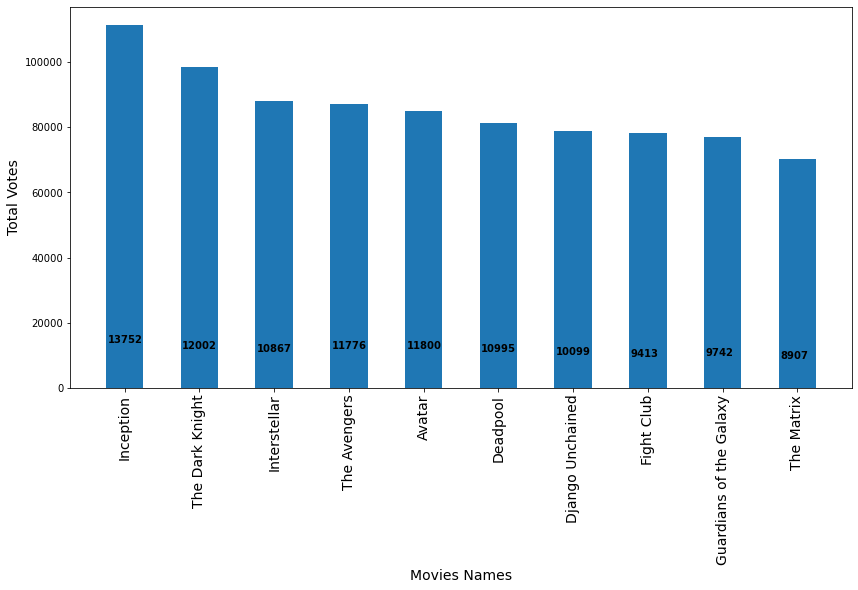

In [78]:
fig, ax = plt.subplots(figsize = (14,7))
ax.bar(table4['title'].iloc[0:10], table4['total_vote'].iloc[0:10], width = 0.5)
ax.set_xticklabels(table4['title'].iloc[0:10], rotation = 90, fontsize = 14)
ax.set_xlabel('Movies Names', fontsize = 14)
ax.set_ylabel('Total Votes', fontsize = 14)

total_votes = table4.vote_count.values.tolist()
total_votes_10 = total_votes[:10]

for i, j in enumerate(total_votes_10):
    ax.text(i-0.23, j, str(j), color='k',fontweight='bold')

In [83]:
df1[df1['title'] == 'Nurse 3-D']

,budget,genres,original_language,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,title,vote_average,vote_count,total_votes
3137,0.00001,"[Horror, Thriller]",en,"Abby Russell, a beautiful, dedicated nurse wit...",10.013629,"[Lions Gate, Lions Gate Entertainments]",[United States of America],9/28/2013,10.0,99.0,Nurse 3-D,4.9,119,583.1
